In [136]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [158]:
def cal_shortest_vec(P, point_line, vec_director):
    vec_director = vec_director/np.linalg.norm(vec_director)
    vector_to_point = P - (point_line + np.dot((P-point_line)[:, 0], vec_director)*vec_director)
    return vector_to_point


def cal_closest_point(P, point_line, vec_director):
    vec_director = vec_director/np.linalg.norm(vec_director)
    closest_point = point_line + np.dot((P-point_line)[:, 0], vec_director)*vec_director
    return closest_point
    
    
def cal_best_scale_up(im_shape, increase_w, increase_h):
    w, h = im_shape
    scale_w = (w + increase_w)/w
    scale_h = (h + increase_h)/h
    return max([scale_w, scale_h])

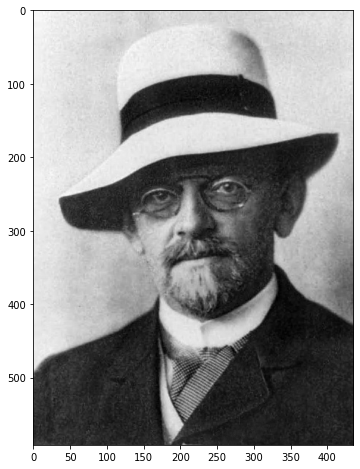

In [138]:
im = cv2.imread('sample_picture_02.jpg')

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im[:, :, [2,1,0]])

In [188]:
(h, w) = im.shape[:2]
(cX, cY) = (w//2, h//2)

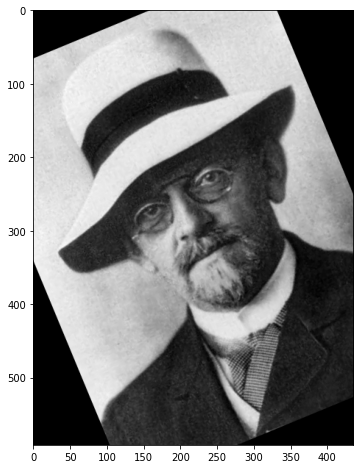

In [189]:
theta = np.pi/8

M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated)

In [190]:
a = np.array([[-cX, cY]]).T
b = np.array([[-cX, -cY]]).T
c = np.array([[cX, -cY]]).T
d = np.array([[cX, cY]]).T

rotation_matrix = np.array(
    [
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]
)

ap = np.dot(rotation_matrix, a)
bp = np.dot(rotation_matrix, b)
cp = np.dot(rotation_matrix, c)
dp = np.dot(rotation_matrix, d)

In [191]:
max_scale_a, max_scale_b

(1.1900611525054117, 1.4097280031077164)

In [192]:
vector_to_point = cal_shortest_vec(a, ap, dp - ap)
max_scale_a = cal_best_scale_up((w, h), abs(2*vector_to_point[0, 0]), abs(2*vector_to_point[1, 0]))

vector_to_point = cal_shortest_vec(b, bp, ap - bp)
max_scale_b = cal_best_scale_up((w, h), abs(2*vector_to_point[0, 0]), abs(2*vector_to_point[1, 0]))

max_scale = max([max_scale_a, max_scale_b])

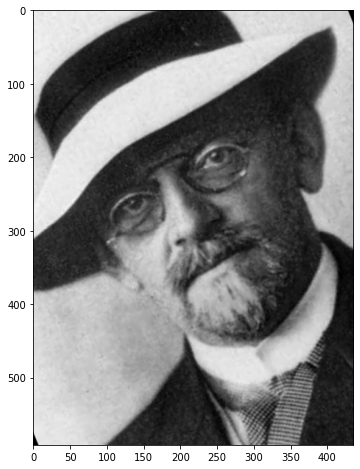

In [196]:
M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, max_scale)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated)

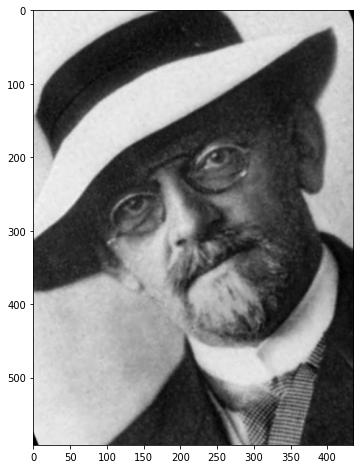

In [197]:
M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1)
im_rotated = cv2.warpAffine(im, M, (w, h))

im_scaled = cv2.resize(im_rotated, (math.ceil(w*max_scale), math.ceil(h*max_scale)))
h_scaled, w_scaled = im_scaled.shape[:2]
w_extra, h_extra = w_scaled-w, h_scaled-h

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_scaled[h_extra//2:-h_extra//2, w_extra//2:-w_extra//2, :])

In [207]:
closest_point_a = cal_closest_point(a, ap, dp - ap)
closest_point_b = cal_closest_point(b, bp, ap - bp)

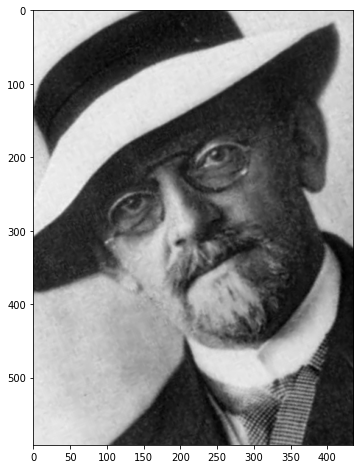

In [241]:
M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1.44)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated)

In [209]:
cX_full, cY_full = w//2, h//2

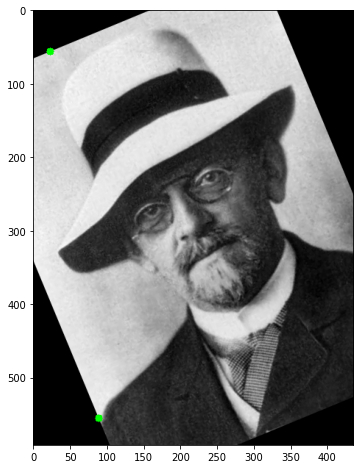

In [212]:
fig, ax = plt.subplots(figsize=(12,8))

im_rotated_toPlot = cv2.circle(im_rotated.copy(), (round(closest_point_a[0, 0])+cX_full, round(-closest_point_a[1, 0])+cY_full), 5, (0, 255, 0), -1)
im_rotated_toPlot = cv2.circle(im_rotated_toPlot, (round(closest_point_b[0, 0])+cX_full, round(-closest_point_b[1, 0])+cY_full), 5, (0, 255, 0), -1)
plt.imshow(im_rotated_toPlot)

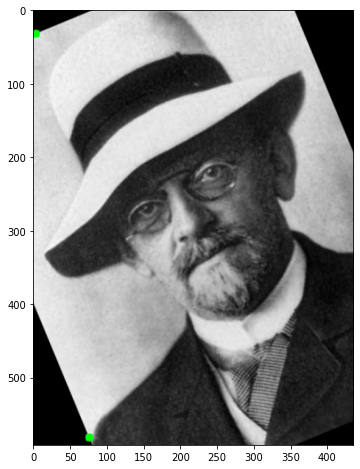

In [215]:
max_scale = 1.1

im_scaled = cv2.resize(im_rotated_toPlot, (math.ceil(w*max_scale), math.ceil(h*max_scale)))
h_scaled, w_scaled = im_scaled.shape[:2]
w_extra, h_extra = w_scaled-w, h_scaled-h

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_scaled[h_extra//2:-h_extra//2, w_extra//2:-w_extra//2, :])

In [232]:
growth_vector = np.array([[w, h]]).T
growth_vector = growth_vector/np.linalg.norm(growth_vector)
point_line(a, growth_vector, ap, dp-ap)*growth_vector

array([[17.22074252],
       [23.38229259]])

In [234]:
growth_vector = np.array([[w, h]]).T
growth_vector = growth_vector/np.linalg.norm(growth_vector)
point_line(b, growth_vector, bp, ap-bp)*growth_vector

array([[ 97.45832051],
       [132.32872877]])

In [238]:
(w+2*97)/w, (h+2*132)/h

(1.444954128440367, 1.445945945945946)

In [230]:
def point_line(P, growth_vector, point_line, vec_director):
    vec_director = vec_director/np.linalg.norm(vec_director)
    M = np.concatenate([growth_vector, vec_director], axis=1)
    x = np.linalg.solve(M, P-point_line)
    return x[1,0]

In [111]:
def cal_closest_point(P, point_line, vec_director):
    vec_director = vec_director/np.linalg.norm(vec_director)
    closest_point = point_line + np.dot((P-point_line)[:, 0], vec_director)*vec_director
    return closest_point
    
    
def cal_best_scale_up(im_shape, closest_point, P):
    w, h = im_shape
    scale_w = P[0, 0]/closest_point[0, 0]
    scale_h = P[1, 0]/closest_point[1, 0]
    return scale_w, scale_h

In [125]:
closest_point_a = cal_closest_point(a, ap, dp - ap)
max_scale_a = cal_best_scale_up((nW, nH), closest_point_a, a)

closest_point_b = cal_closest_point(b, bp, ap - bp)
max_scale_b = cal_best_scale_up((nW, nH), closest_point_b, b)

In [124]:
max_scale_a, max_scale_b

((1.1196877853568075, 1.2346611143462674),
 (1.6941342385627114, 1.1428476438876012))

In [117]:
a, closest_point_a

(array([[-218],
        [ 296]]),
 array([[-194.69713151],
        [ 239.74189886]]))

In [118]:
b, closest_point_b

(array([[-218],
        [-296]]),
 array([[-128.67929532],
        [-259.00215272]]))

In [96]:
(nW + abs(2*vector_to_point[0, 0]))/nW, (nH + abs(2*vector_to_point[1, 0]))/nH

(1.2840085999284012, 1.10378077777878)

In [134]:
max_scale = 1.19

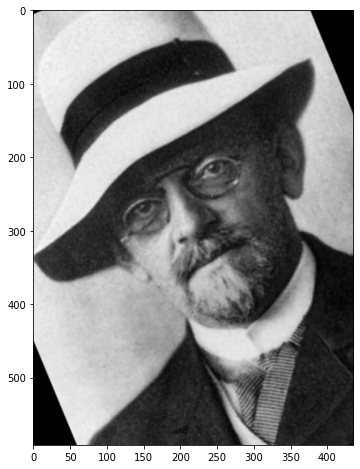

In [135]:
im_scaled = cv2.resize(im_rotated, (math.ceil(nW*max_scale), math.ceil(nH*max_scale)))
h_scaled, w_scaled = im_scaled.shape[:2]
w_extra, h_extra = w_scaled-w, h_scaled-h

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_scaled[h_extra//2:-h_extra//2, w_extra//2:-w_extra//2, :])